In [3]:
! pip install wand

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:01


In [3]:
! brew uninstall imagemagick
! brew install imagemagick@6
! brew unlink imagemagick
! brew link imagemagick@6 --force
! echo 'export MAGICK_HOME="/usr/local/opt/imagemagick@6/lib"' >> ~/.bash_profile
! echo 'export PATH="/usr/local/opt/imagemagick@6/bin:$PATH"' >> ~/.bash_profile

! source ~/.bash_profile

Uninstalling /opt/homebrew/Cellar/imagemagick/7.1.0-51... (805 files, 30.8MB)
==> Downloading https://ghcr.io/v2/homebrew/core/imagemagick/6/manifests/6.9.12-
######################################################################## 100.0%
==> Downloading https://ghcr.io/v2/homebrew/core/imagemagick/6/blobs/sha256:3681
==> Downloading from https://pkg-containers.githubusercontent.com/ghcr1/blobs/sh
######################################################################## 100.0%
==> Pouring imagemagick@6--6.9.12-66.arm64_monterey.bottle.tar.gz
==> Caveats
imagemagick@6 is keg-only, which means it was not symlinked into /opt/homebrew,
because this is an alternate version of another formula.

If you need to have imagemagick@6 first in your PATH, run:
  echo 'export PATH="/opt/homebrew/opt/imagemagick@6/bin:$PATH"' >> ~/.zshrc

For compilers to find imagemagick@6 you may need to set:
  export LDFLAGS="-L/opt/homebrew/opt/imagemagick@6/lib"
  export CPPFLAGS="-I/opt/homebrew/opt/imagemagick@6

In [ ]:
! convert -list font

In [1768]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from wand.color import Color
from wand.image import Image
from wand.drawing import Drawing
from wand.compat import nested

In [1769]:
# Charatcters 
language = 'abcdefghijklmnopqrstuvwxyz'
language_upper = language.upper()
language += language_upper
language += '0123456789'

assert len(language) == 26 * 2 + 10 
language = language_upper
language

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [1733]:
# Fonts
handwritten_fonts = ['Herculanum', 'Annai MN', 'Bradley Hand', 'Brush Script MT', 'Chalkboard',
             'Comic Sans MS', 'Luminary', 'Noteworthy', 'Papyrus', 'Party LET', 'Savoye LET', 
             'Sign Painter', 'Skia', 'Snell Roundhand', 'Times New Roman', 'Trattatello', 'Zapfino']
typed_fonts = ['Arial', 'Arial Black', 'Arial Narrow', 'Arial Rounded MT Bold', 'Copperplate', 'Courier New', 'Helvetica',
              'Impact', 'Lucinda Grande', 'Microsoft Sans Serif', 'Tahoma', 'Verdana', 'Menlo', 'Didot', 'Copperplate', 'Avenir', 'Futura']

# fonts = handwritten_fonts + typed_fonts 
fonts = ['Copperplate']

In [1770]:
# resolution
width=200
height=200
font_size=100
background = Color('white')
foreground=Color('rgb(0, 0, 0)')

In [1771]:
language

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [1772]:
for f in tqdm(fonts):
    for c in language:
        if c in language_upper:
            if not os.path.exists(f'{c}{c}'):
                os.mkdir(f'{c}{c}')
            filename = os.path.join(f'{c}{c}', f'{f}.png')
        else:
            if not os.path.exists(c):
                os.mkdir(f'{c}')
            filename = os.path.join(f'{c}', f'{f}.png')

        with Drawing() as draw:
            with Image(width=width, height=height, background=background) as img:
                draw.font_family = f
                draw.font_size = font_size
                draw.push()
                draw.fill_color = foreground
                draw.text(0,int(img.height/2), c)
                draw.pop()
                draw(img)
                if os.path.exists(filename):
                    os.unlink(filename)
                img.save(filename='tmp.png')

                img = cv2.imread('tmp.png')
            
                os.unlink('tmp.png')
                ys, xs = np.where(np.all(img == (0, 0, 0), axis=-1))

                cropped = img[min(ys):max(ys)+1, min(xs):max(xs)+1]
                cv2.imwrite(filename, cropped)
            

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]


#### Inference

##### Functions

In [1773]:
import matplotlib.pyplot as plt
def show(img):
    plt.imshow(img, cmap='gray')

# Read
def read(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def bin(img, bins=10, min_diff=20):
    count, division = np.histogram(img, bins)
    diff_series = pd.Series(count).diff()
    
    first_histogram_reduction_index = diff_series[(diff_series < 0) & (np.abs(diff_series) > min_diff)].index[0]
    threshold = division[first_histogram_reduction_index+1]
        
    _, img = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    return img

def neg(img):
    return 255 - img

def redraw_contours(img): 
    # Find contours and redraw
    contours, hierarchy = cv2.findContours(image=img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
    # draw contours on the original image
    image_copy = img.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=16, lineType=cv2.LINE_AA)
    return image_copy

def resize(img, size=(100, 100)):
    return cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)

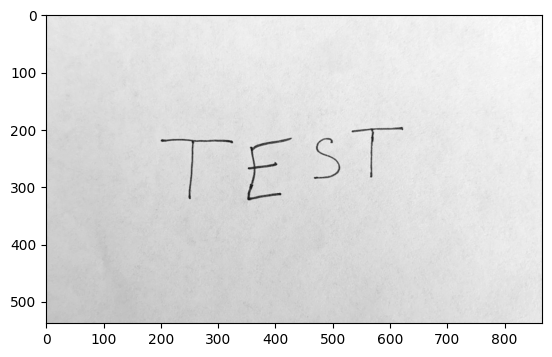

In [1774]:
img = read('test.png')
show(img)

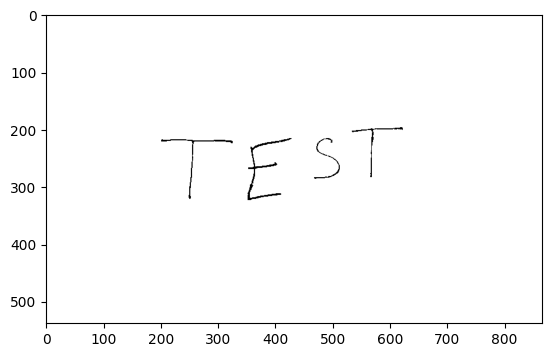

In [1775]:
img = bin(img)
show(img)

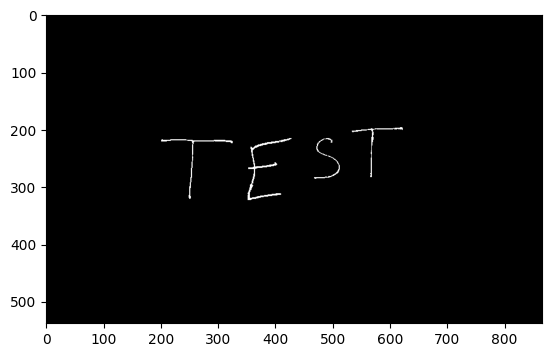

In [1776]:
# Negate image
img = neg(img)
show(img)

In [1777]:
# # Find contours and redraw
# contours, hierarchy = cv2.findContours(image=img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)

# # draw contours on the original image
# image_copy = img.copy()
# cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 255, 255), thickness=4, lineType=cv2.LINE_AA)
# show(image_copy)

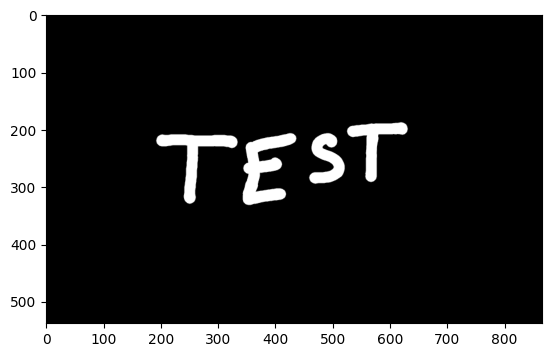

In [1778]:
img = redraw_contours(img)
show(img)

In [1779]:
# Apply gausian blur + rebinarizing to fill gaps and remove noise
# input = cv2.GaussianBlur(input, (1, 1), cv2.BORDER_DEFAULT)
# plt.imshow(input, cmap='gray')

5


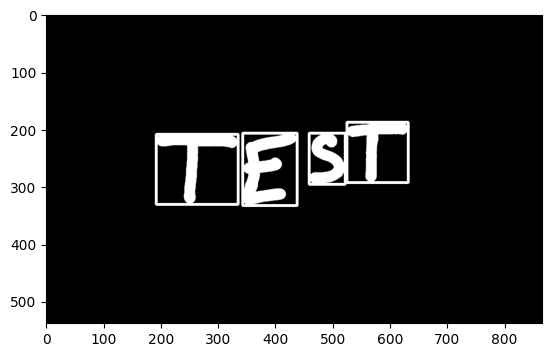

In [1780]:
# Connected components
output = cv2.connectedComponentsWithStats(img, 4, cv2.CV_32S)
num_letters = output[0]
letters = output[1]
stats = output[2]
centroids = output[3]

print(num_letters)
letter_imgs = []

image_copy = img.copy()
for l in range(1, num_letters):
    minx = stats[l, cv2.CC_STAT_LEFT]
    maxx = stats[l, cv2.CC_STAT_WIDTH] + minx
    miny = stats[l, cv2.CC_STAT_TOP] 
    maxy = stats[l, cv2.CC_STAT_HEIGHT] + miny

    cropped_img = img[miny:maxy+1, minx: maxx+1].copy()
    letter_imgs.append(cropped_img)
    cv2.rectangle(image_copy,(minx, miny), (maxx, maxy) ,(255, 255, 255), 3)
    
show(image_copy)

In [1781]:
letter_imgs = [neg(l) for l in letter_imgs]

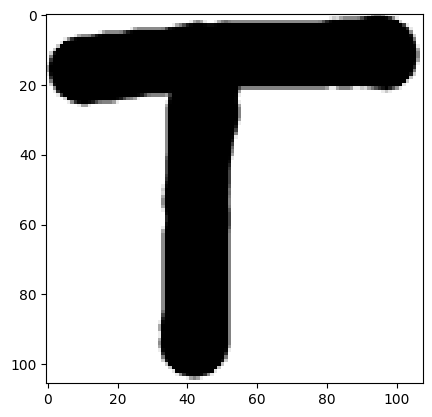

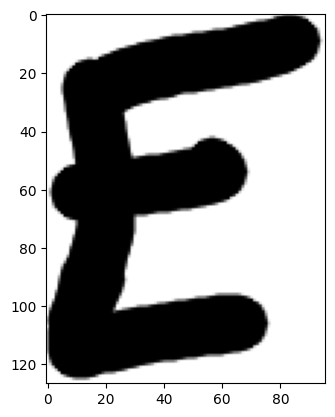

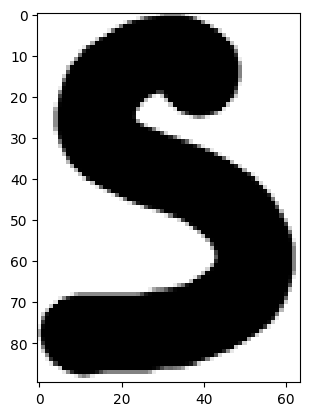

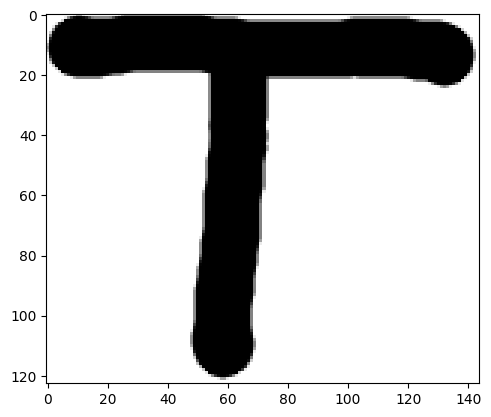

In [1782]:
for l in letter_imgs:
    show(l)
    plt.show()

In [1783]:
def classify(letter_img, inference_size=(500, 500), _filter='.png'):
    results = []
    for c in language:
        if c in language_upper:
            fld = f'{c}{c}'
        else:
            fld = f'{c}'
            
        files = [x for x in os.listdir(fld) if x.endswith(_filter)]
        # try:
        #     assert len(files) >= 17
        # except:
        #     print(fld)
        #     raise

        letter_img_r = bin(cv2.resize(letter_img, inference_size, interpolation=cv2.INTER_NEAREST))
        for f in files: 
            ## TODO Check and possibly binarize all when reading
            path = os.path.join(fld, f)
            img_f = bin(cv2.imread(path, cv2.IMREAD_GRAYSCALE))
            img_fr = bin(cv2.resize(img_f, inference_size, interpolation=cv2.INTER_NEAREST))
            
            iou = (letter_img_r//255 & img_fr//255).sum() / (letter_img_r//255 | img_fr//255).sum()
            results.append( {
                'char': c,
                'font': f,
                'iou': iou
            })
    results = pd.DataFrame(results)
    
    # selection
    g = results.groupby('char')['iou'].mean()
    character = g[g == g.max()].index[0]
    return character, results

In [1784]:
[classify(l)[0] for l in letter_imgs]

['T', 'E', 'S', 'T']

In [1765]:
c, r = classify(letter_imgs[1], inference_size=(200, 200))
# r.groupby('char')['iou'].median().sort_values(ascending=False).head(9)

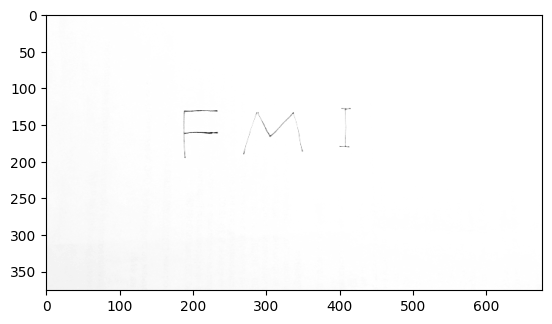

In [1826]:
x = read('fff.jpg')
show(x)

In [1831]:
np.histogram(x.reshape(-1), bins=20)

(array([     7,      5,     10,      9,     10,     15,     15,     19,
            15,     16,     29,     24,     49,     40,     70,     47,
            67,     84,   1097, 252924]),
 array([  5. ,  17.5,  30. ,  42.5,  55. ,  67.5,  80. ,  92.5, 105. ,
        117.5, 130. , 142.5, 155. , 167.5, 180. , 192.5, 205. , 217.5,
        230. , 242.5, 255. ]))

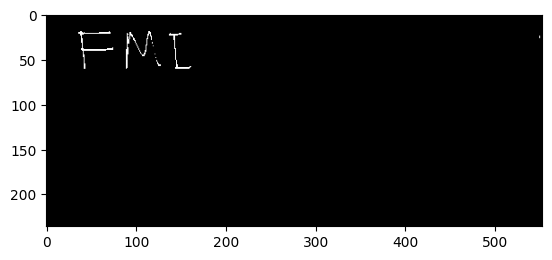

In [1815]:
z = neg(y)
show(z)

In [1816]:
z = redraw_contours(z)

4


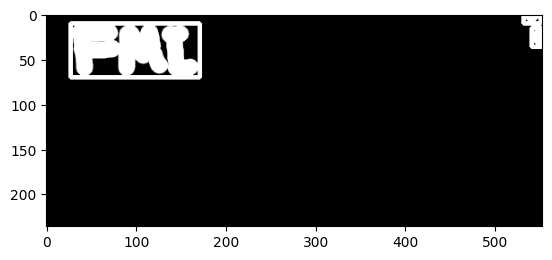

In [1817]:
# Connected components
output = cv2.connectedComponentsWithStats(z, 4, cv2.CV_32S)
num_letters = output[0]
letters = output[1]
stats = output[2]
centroids = output[3]

print(num_letters)
letter_imgs = []

image_copy = z.copy()
for l in range(1, num_letters):
    minx = stats[l, cv2.CC_STAT_LEFT]
    maxx = stats[l, cv2.CC_STAT_WIDTH] + minx
    miny = stats[l, cv2.CC_STAT_TOP] 
    maxy = stats[l, cv2.CC_STAT_HEIGHT] + miny

    cropped_img = z[miny:maxy+1, minx: maxx+1].copy()
    letter_imgs.append(cropped_img)
    cv2.rectangle(image_copy,(minx, miny), (maxx, maxy) ,(255, 255, 255), 3)
    
show(image_copy)

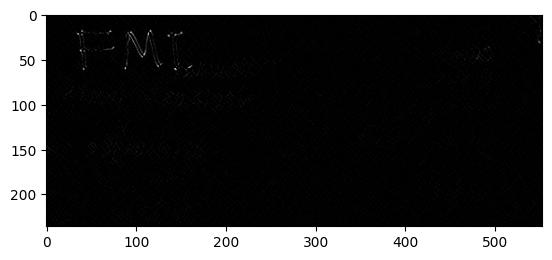

In [1792]:
k1 = np.array([[1, 0, -1], 
                [0, 0, 0], 
                [-1, 0, 1]])
k2 = np.array([[0, -1, 0], 
                   [-1, 4, 1], 
                   [0, -1, 0]])
k3 = np.array([[-1, -1, -1], 
                [-1, 8, -1], 
                [-1, -1, -1]])
edge = cv2.filter2D(x, -1, k1)

show(edge)